In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Netflix.data import Movies

In [34]:
# Chris dataset
df = pd.read_csv('/Users/renatoboemer/code/boemer00/Netflix/raw_data/merged_movies_by_index.csv')

In [ ]:
# data split

# Data Wrangling

In [36]:
df.shape  # (10386, 34)

(10386, 34)

In [42]:
df.sample(1)

,avg_review_score,n_reviews,year,title,Title,Year,Rated,Released,Runtime,Genre,...,Response,Internet Movie Database,Index_match,DVD,BoxOffice,Production,Website,Rotten Tomatoes,Metacritic,Ratings
8060,3.597931,4059,1988,The Vanishing,The Vanishing,1988,Not Rated,27 Oct 1988,107 min,"Mystery, Thriller",...,True,7.7/10,13825,25 Mar 2017,NaN,Argos Films,NaN,98%,NaN,NaN


In [38]:
df.columns

Index(['avg_review_score', 'n_reviews', 'year', 'title', 'Title', 'Year',
       'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'totalSeasons', 'Response',
       'Internet Movie Database', 'Index_match', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Rotten Tomatoes', 'Metacritic', 'Ratings'],
      dtype='object')

In [43]:
df.drop(columns=['title', 'year', 'Awards', 'Poster', 'Metascore', 'Internet Movie Database',
                 'totalSeasons', 'Response','Index_match', 'DVD', 'BoxOffice', 'imdbVotes',
                 'Production', 'Website', 'Metacritic', 'Ratings'], inplace=True)

### Runtime

In [82]:
df['Runtime'] = df['Runtime'].fillna(0)

### Actors

In [90]:
# replace null values with unknown
df['Actors'] = df['Actors'].replace(np.nan,'unknown')
df['Actors'].isnull().sum()

0

### Director

In [91]:
df['Director'] = df['Director'].replace(np.nan,'unknown')
df['Director'].isnull().sum()

0

### Writer

In [92]:
df['Writer'] = df['Writer'].replace(np.nan,'unknown')
df['Writer'].isnull().sum()

0

### Language

In [93]:
df["Language"] = df[["Language"]].fillna("English")

In [94]:
df["Language"].isnull().sum()

0

In [95]:
type(df["Language"][1])

str

In [96]:
df["Language"] = df[["Language"]].fillna("English")

def language_binary(x):
    if x.find("English") != -1:
        return "English Available"
    else:
        return "English N/A"

In [99]:
language_binary(df["Language"][1])
language_binary(df["Language"][3])

'English Available'

In [98]:
df["Language_binary"] = df["Language"].map(language_binary)

### Plot

In [109]:
df['Plot'] = df['Plot'].replace(np.nan,'unknown')

### Genre

In [176]:
freq_genre = df['Genre'].mode()[0]

'Drama'

In [178]:
freq_genre = df['Genre'].mode()[0]
df['Genre'] = df['Genre'].replace(np.nan, freq_genre)

0

# Trainer Function

In [46]:
def data_wrangling(self):
    """ cleaning irrelevant rows and columns """ 
    
    df = self.drop(columns=['title', 'year', 'Awards', 'Poster', 'Metascore','totalSeasons', 'imdbVotes',
                          'Response','Index_match', 'DVD', 'BoxOffice','Production', 'Internet Movie Database',
                          'Website', 'Metacritic', 'Ratings'], inplace=True)
    
    ## fill nan and' min', convert to int and replace zero for the mean
    df['Runtime'] = df['Runtime'].fillna(0)
    df['Runtime'] = df['Runtime'].apply(lambda x: int(str(x).replace(' min', '')))
    df['Runtime'] = df['Runtime'].replace(0, df['Runtime'].mean())
    
    ## fill nan and remove '%', convert to float and replace zero for the mean
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(0) 
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: float(str(x).replace('%', '')))
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].replace(0, df['Rotten Tomatoes'].mean())
    
    ## replace countries and genre with most frequent values
    freq_country = df[['Country']].value_counts().reset_index()['Country'][0]
    df['Country'] = df['Country'].replace(0, freq_country).replace('United States', freq_country)
    
    freq_genre = df['Genre'].mode()[0]
    df['Genre'] = df['Genre'].replace(np.nan, freq_genre)

    # replace null values with unknown
    df['Actors'] = df['Actors'].replace(np.nan,'unknown')
    df['Director'] = df['Director'].replace(np.nan,'unknown')
    df['Writer'] = df['Writer'].replace(np.nan,'unknown')
    df['Plot'] = df['Plot'].replace(np.nan,'unknown')
    
    ## Language binary (either contains English or not)
    df["Language"] = df[["Language"]].fillna("English")
    def language_binary(x):
        if x.find("English") != -1:
            return "English Available"
        else:
            return "English N/A"
    df["Language_binary"] = df["Language"].map(language_binary)
    
    # renturn df
    
    

SyntaxError: invalid syntax (<ipython-input-46-c084d2ba4136>, line 17)

'Documentary, Animation, Family'

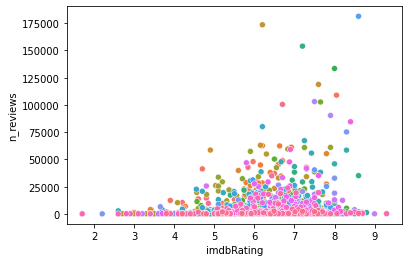

In [153]:
# scatterplot - genre
df_genre = df.groupby(by=['Genre']).mean().reset_index()
ax = sns.scatterplot(data=df_genre, x='imdbRating', y='n_reviews', hue='Genre', legend=False)

In [155]:
df_genre['Genre'].nunique() ## --> should we keep all these combinations?

1484

In [158]:
df_genre.shape

(1484, 5)

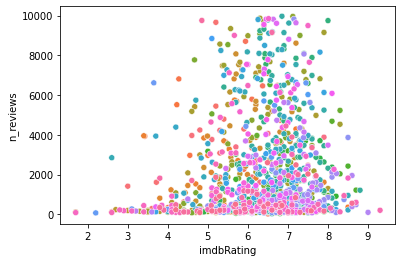

In [167]:
df_genre_10k = df_genre[df_genre['n_reviews'] < 10000]
df_genre_10k.shape  ## --> (1229, 5)
ax = sns.scatterplot(data=df_genre_50k, x='imdbRating', y='n_reviews', hue='Genre', legend=False)

In [ ]:
# histogram - movies up to 200 min (~3h30)
runtime = df[df['Runtime'] < 200]['Runtime'].reset_index()
sns.displot(x="Runtime", data=runtime, bins=15, kde=True);

### avg_review_score

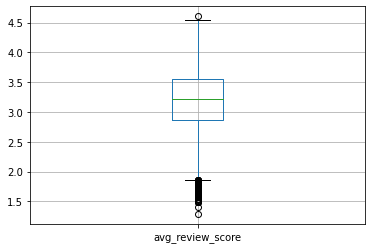

In [45]:
# check for outliers
df[['avg_review_score']].boxplot();